In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/danielvieira95/Intelig-ncia-Artificial-e-Big-Data--2-2024/refs/heads/master/Bases%20de%20dados/dados_produtos.csv")

In [4]:
display(df.head())


,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [5]:
df.info

<bound method DataFrame.info of    product_name  rating  rating_count  purchased
0     Televisão    3.04            29          1
1       Celular    3.46          3872          0
2     Cafeteira    3.25          1187          0
3     Televisão    3.77          4097          1
4     Videogame    5.00          4738          1
..          ...     ...           ...        ...
95         iPod    4.44          1372          0
96      Celular    4.66          1690          1
97    Televisão    4.33          3364          1
98     Notebook    3.30          1825          1
99         iPod    4.08           533          0

[100 rows x 4 columns]>

In [6]:
display(df.describe())

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


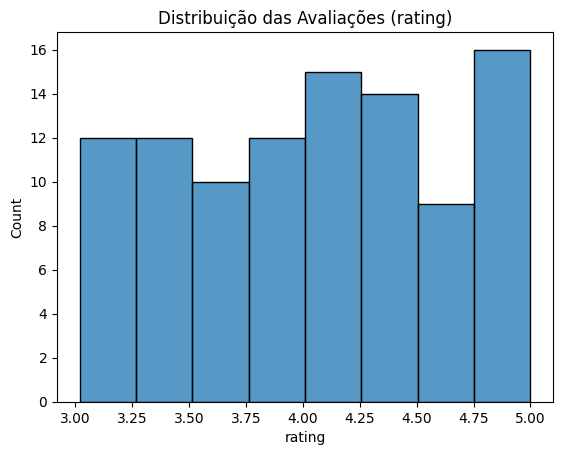

In [13]:
sns.histplot(df["rating"])
plt.title("Distribuição das Avaliações (rating)")
plt.show()

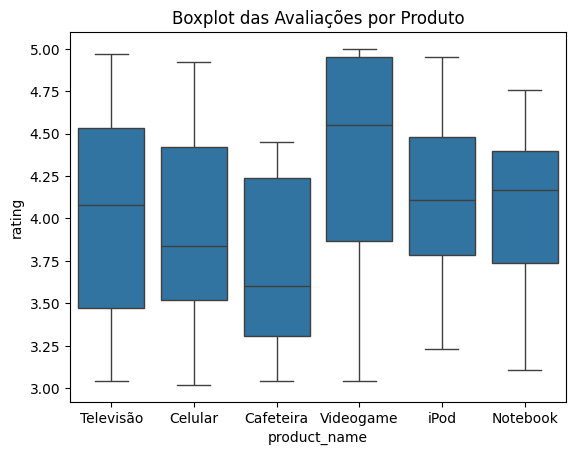

In [17]:
sns.boxplot(x="product_name", y="rating", data=df)
plt.title("Boxplot das Avaliações por Produto")
plt.show()

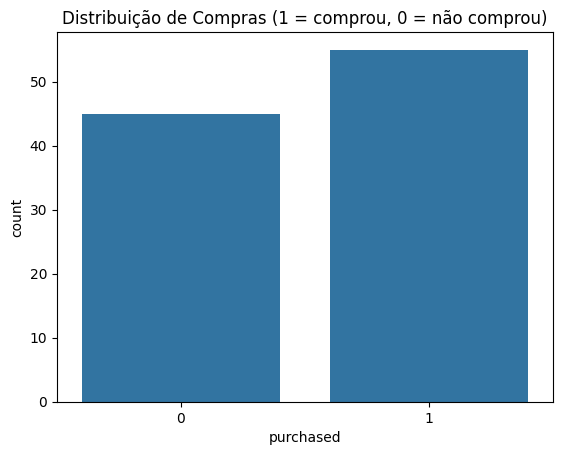

In [19]:
sns.countplot(x="purchased", data=df)
plt.title("Distribuição de Compras (1 = comprou, 0 = não comprou)")
plt.show()

In [20]:
print(df.isnull().sum())

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64


In [21]:
df["product_name"] = df["product_name"].astype("category").cat.codes

In [22]:
X = df[["product_name", "rating", "rating_count"]]
y = df["purchased"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (80, 3)
Tamanho do conjunto de teste: (20, 3)


In [ ]:
modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
y_pred = modelo.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.20      0.12         5
           1       0.56      0.33      0.42        15

    accuracy                           0.30        20
   macro avg       0.32      0.27      0.27        20
weighted avg       0.44      0.30      0.34        20



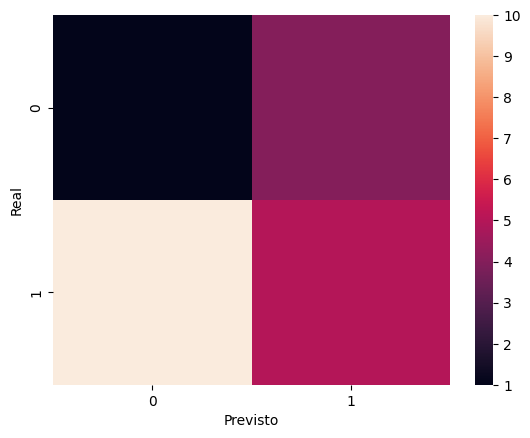

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

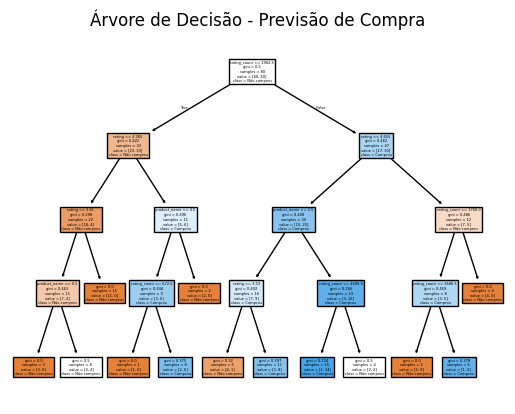

In [40]:
plot_tree(modelo, feature_names=X.columns, class_names=["Não comprou", "Comprou"], filled=True)
plt.title("Árvore de Decisão - Previsão de Compra")
plt.show()